### Convolutional Neural Networks - Transfer Learning

Hanyang U. 2023

Dates: 2023-3-30

Author: Yung-Kyun Noh

Department of Computer Science, Hanyang University / School of Computational Sciences, KIAS


In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="3"

In [2]:
# VGG16 network pre-trained on the ImageNet dataset
from tensorflow.keras.applications import VGG16

model = VGG16(weights="imagenet")
model.summary()

553476096/553467096 [==============================] - 15s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [3]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

base_model.summary()

58900480/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [4]:
base_model.trainable = False

In [5]:
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1, name='predictions')(x)
model = keras.Model(inputs, outputs)

In [6]:
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

https://www.kaggle.com/ankitachoudhury01/covid-patients-chest-xray

In [7]:
# data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) # we don't expect Bo to be upside-down so we will not flip vertically

In [8]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('./COVID/train/', 
                                       target_size=(224, 224), 
                                       color_mode='rgb', 
                                       class_mode='binary', 
                                       batch_size=8)
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('./COVID/test/', 
                                      target_size=(224, 224), 
                                      color_mode='rgb', 
                                      class_mode='binary', 
                                      batch_size=8)

Found 258 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


In [9]:
model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, epochs=20)

Epoch 1/20
12/12 [==============================] - 7s 177ms/step - loss: 1.4924 - binary_accuracy: 0.3750 - val_loss: 1.5193 - val_binary_accuracy: 0.4375
Epoch 2/20
12/12 [==============================] - 2s 140ms/step - loss: 1.3199 - binary_accuracy: 0.4688 - val_loss: 1.7273 - val_binary_accuracy: 0.2812
Epoch 3/20
12/12 [==============================] - 1s 106ms/step - loss: 1.1180 - binary_accuracy: 0.5111 - val_loss: 1.1684 - val_binary_accuracy: 0.4688
Epoch 4/20
12/12 [==============================] - 1s 116ms/step - loss: 1.0997 - binary_accuracy: 0.5625 - val_loss: 0.9040 - val_binary_accuracy: 0.5938
Epoch 5/20
12/12 [==============================] - 1s 112ms/step - loss: 0.9361 - binary_accuracy: 0.5000 - val_loss: 1.0332 - val_binary_accuracy: 0.5312
Epoch 6/20
12/12 [==============================] - 2s 139ms/step - loss: 0.7974 - binary_accuracy: 0.6042 - val_loss: 0.7503 - val_binary_accuracy: 0.6562
Epoch 7/20
12/12 [==============================] - 1s 111ms/ste

In [10]:
# fine tunning
base_model.trainable = True

# reduce learning rate
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [11]:
model.fit(train_it, steps_per_epoch=10, validation_data=valid_it, validation_steps=4, epochs=20)

Epoch 1/20
10/10 [==============================] - 3s 138ms/step - loss: 0.7225 - binary_accuracy: 0.7625 - val_loss: 0.4307 - val_binary_accuracy: 0.8438
Epoch 2/20
10/10 [==============================] - 1s 117ms/step - loss: 0.3575 - binary_accuracy: 0.8125 - val_loss: 0.3810 - val_binary_accuracy: 0.9062
Epoch 3/20
10/10 [==============================] - 2s 154ms/step - loss: 0.2936 - binary_accuracy: 0.8514 - val_loss: 0.2759 - val_binary_accuracy: 0.9062
Epoch 4/20
10/10 [==============================] - 1s 113ms/step - loss: 0.3237 - binary_accuracy: 0.8514 - val_loss: 0.3962 - val_binary_accuracy: 0.8125
Epoch 5/20
10/10 [==============================] - 1s 150ms/step - loss: 0.1323 - binary_accuracy: 0.9625 - val_loss: 0.3068 - val_binary_accuracy: 0.9062
Epoch 6/20
10/10 [==============================] - 2s 190ms/step - loss: 0.3026 - binary_accuracy: 0.8500 - val_loss: 0.5238 - val_binary_accuracy: 0.8125
Epoch 7/20
10/10 [==============================] - 1s 119ms/ste

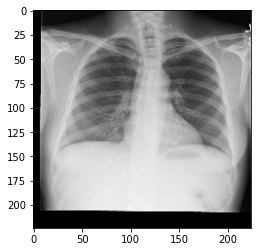

In [12]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input
import matplotlib.pyplot as plt

# _img = load_img("./COVID/test/COVID_PATIENTS/covid_77.jpg",target_size=(224,224))
_img = load_img("./COVID/test/NORMAL_PATIENTS/normal_70.jpg",target_size=(224,224))
plt.imshow(_img)
plt.show()

In [13]:
import numpy as np
img = np.array(_img).reshape(-1, 224, 224, 3)
y_pred = model.predict(img)
print(y_pred)

[[4.9943943]]


In [14]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}